# Model Generation

In [11]:
import time_series as ts
import numpy as np

Load in dataset.

In [12]:
X_combined = np.load('training_data/motley_X_combined.npy')
y_combined = np.load('training_data/motley_y_combined.npy')


Check the shape.

In [13]:
X_combined.shape, y_combined.shape

((22310, 10, 21), (22310,))

Create a StockPredictor object that encapsulates model details. We use default parameters that we determined for our final model.

In [14]:
predictor = ts.StockPredictor(21)
predictor.setup_model(normalize=True)
X_train, X_val, _, y_train, y_val, _ = ts.time_series_split(X_combined, y_combined, validation_size=0.2, test_size=0.0)

Load in training data and train.

 33%|███▎      | 1/3 [00:01<00:03,  1.88s/it]

Epoch [1/3], Train Loss: 0.0006, Val Loss: 0.0001


 67%|██████▋   | 2/3 [00:03<00:01,  1.82s/it]

Epoch [2/3], Train Loss: 0.0005, Val Loss: 0.0011


100%|██████████| 3/3 [00:05<00:00,  1.83s/it]

Epoch [3/3], Train Loss: 0.0005, Val Loss: 0.0001


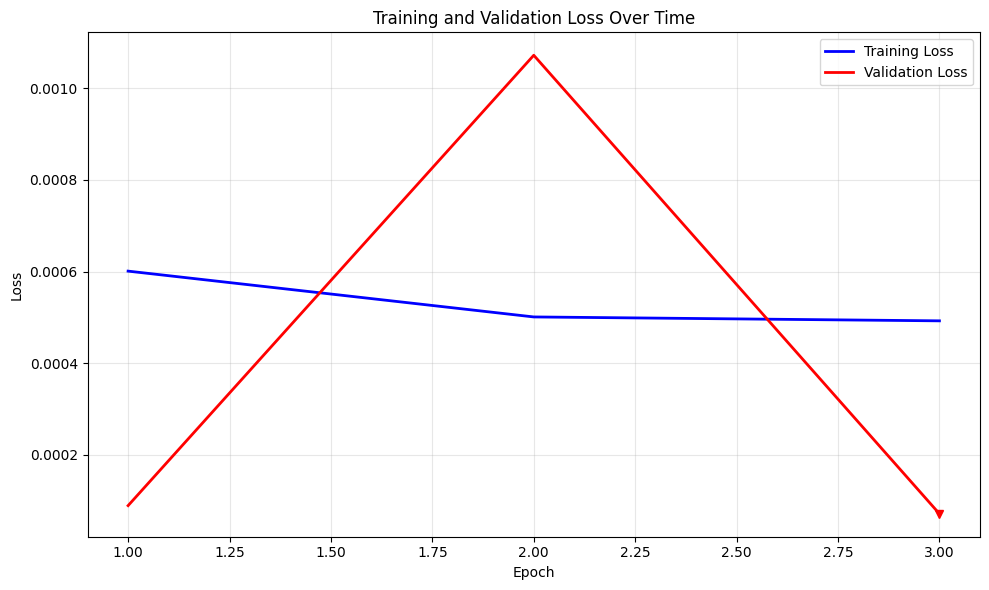

{'train_loss': [np.float64(0.0006009135145737715),
  np.float64(0.000500840907629558),
  np.float64(0.000492313204065998)],
 'val_loss': [np.float64(8.870553347151144e-05),
  np.float64(0.001072385409913425),
  np.float64(7.087902095333577e-05)]}

In [18]:
predictor.load_training_data(X_train, y_train)
predictor.load_validation_data(X_val, y_val)
predictor.train(batch_size=64, num_epochs=3, learning_rate=0.001)


Save model and load the test data.

In [6]:
predictor.save_model('model.pth')

In [20]:
predictor.load_test_data(np.load('training_data/motley_X_test.npy'), np.load('training_data/motley_y_test.npy'))

This function runs metrics on our loaded test data.

[119.87182  123.117905 121.178116 121.41963  121.57136  121.39522
 120.81336  121.2937   123.08564  124.3768   125.10227  125.29554
 126.841324 130.70406  133.38626  132.33105  130.21483  128.62344
 125.420746 121.55784  120.3935   120.069626 117.95961  116.35183
 113.916435 115.16974  113.97968  113.05851  113.28551  114.886406
 113.500694 111.61069  111.493164 112.57391  113.71671  112.644264
 112.26985  113.36508  113.87888  113.55703  113.74763  115.00266
 115.32749  116.57043  116.80298  115.70692  115.36179  115.622795]

Test Set Evaluation Metrics:
MSE: 58.3515
RMSE: 7.6388
MAE: 5.9935
R² Score: 0.0185
MAPE: 4.74%
Direction Accuracy: 46.81%


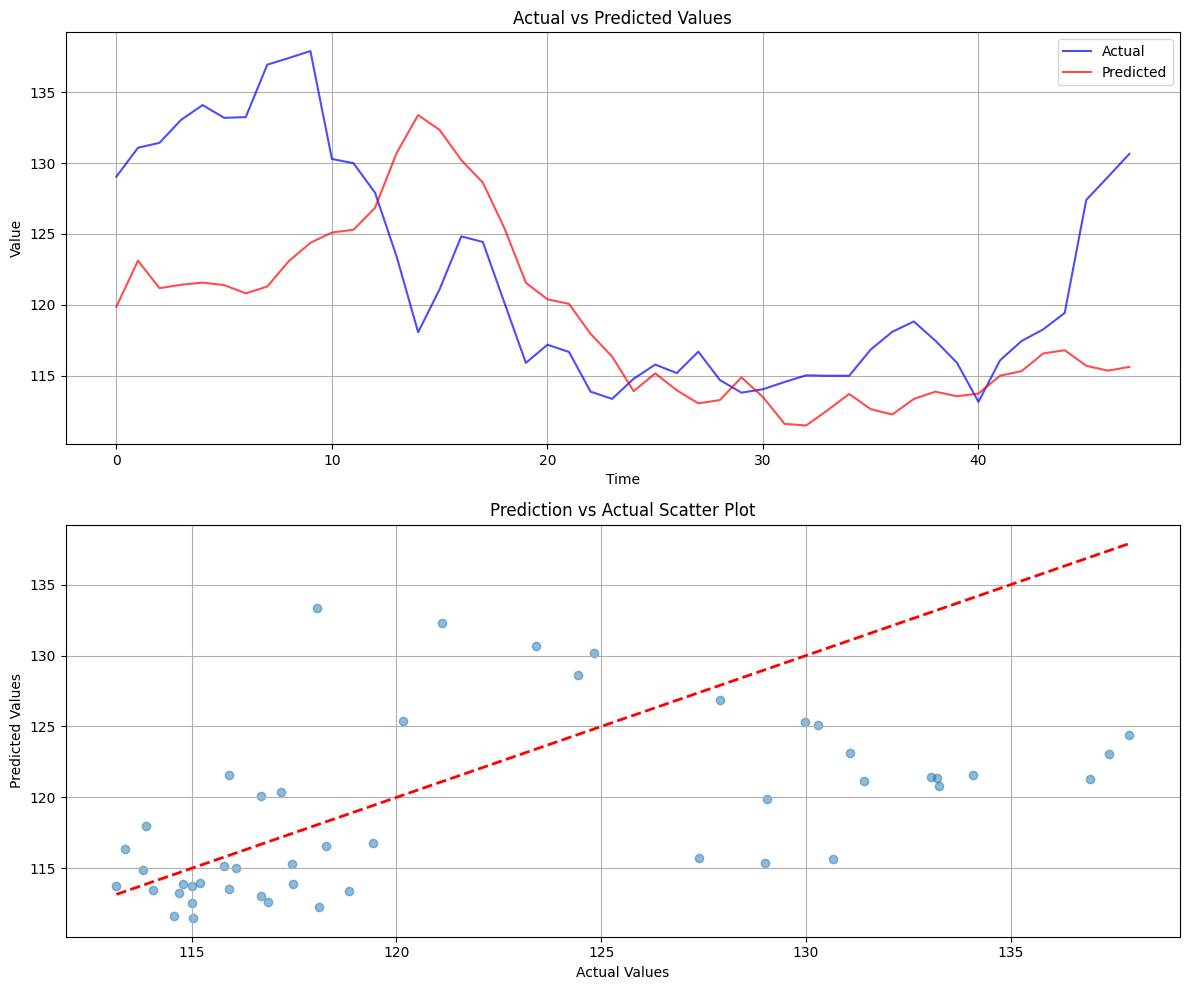

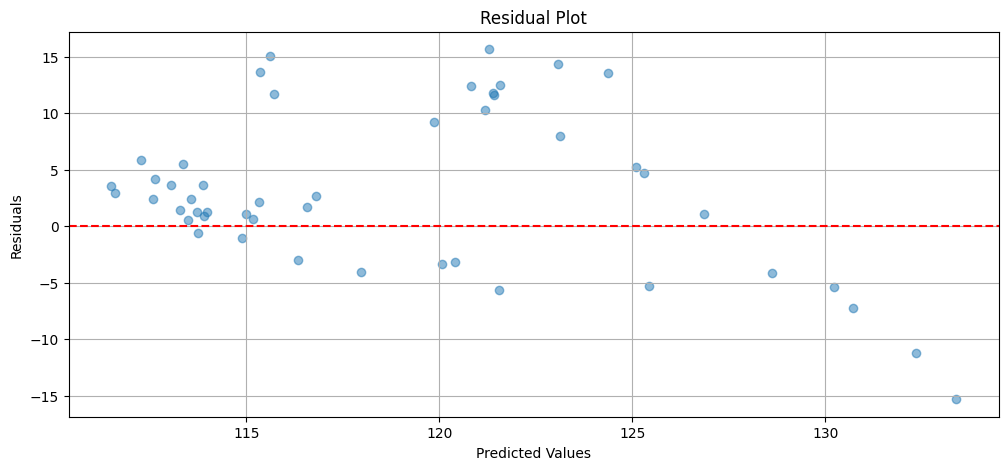

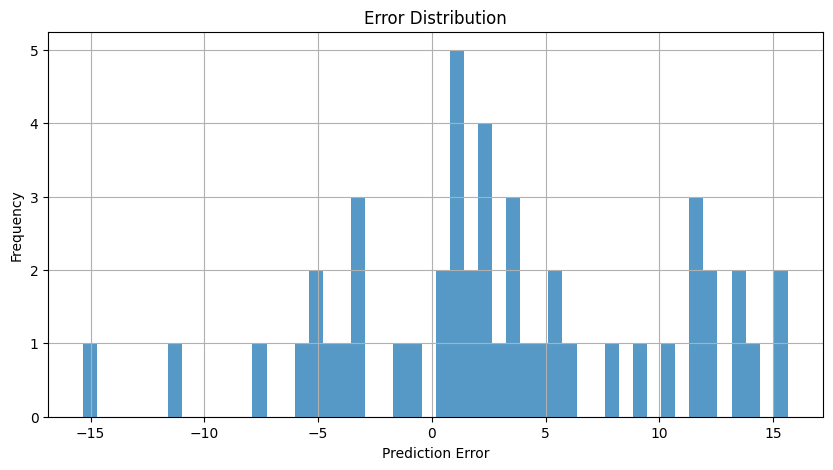

{'mse': np.float64(58.351519374625546),
 'rmse': np.float64(7.638816621350819),
 'mae': np.float64(5.993518511454265),
 'r2': 0.01845694076939186,
 'mape': np.float64(4.742511134544514),
 'direction_accuracy': np.float64(46.808510638297875)}

In [21]:
predictor.evaluate_test_set(display_plots=True)